Load the `tidyverse` and the 🐧`palmerpenguins`🐧 packages.

In [1]:
library('tidyverse')
library('palmerpenguins')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We want to make a jitter chart of normalized penguin length measurements (e.g. `bill_depth_mm`). 

Like this:

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_00_pivot_chart.png?raw=true)

...but our data is not in the right "shape."

Use `pivot_longer` to re-shape the data to create the chart above 👆. 

Then, calculate a normalized value for each measurement by dividing *individual measurement values* by the *maximum value* within the measurement type (e.g. `bill_depth_mm` is a "measurement type") and capture this new value in a new column with `mutate`.

In [7]:
penguins |> mutate(max_bl = max(bill_length_mm), max_bd = max(bill_depth_mm), max_fl = max(flipper_length_mm))|> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,max_bl,max_bd,max_fl
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<dbl>,<dbl>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007,NA,NA,NA
Adelie,Torgersen,39.5,17.4,186,3800,female,2007,NA,NA,NA
Adelie,Torgersen,40.3,18.0,195,3250,female,2007,NA,NA,NA
Adelie,Torgersen,NA,NA,NA,NA,NA,2007,NA,NA,NA
Adelie,Torgersen,36.7,19.3,193,3450,female,2007,NA,NA,NA
Adelie,Torgersen,39.3,20.6,190,3650,male,2007,NA,NA,NA


In [18]:
penguins_long = penguins |> 
    as_tibble() |> 
    pivot_longer(cols = c(flipper_length_mm, bill_length_mm, bill_depth_mm), names_to = 'key', values_to = 'value' ) |> 
    group_by(key) |> 
    mutate(value_normalized = value / max(value, na.rm =TRUE)) |>
    print()

# A tibble: 1,032 × 8
# Groups:   key [3]
   species island    body_mass_g sex     year key               value value_no…¹
   <fct>   <fct>           <int> <fct>  <int> <chr>             <dbl>      <dbl>
 1 Adelie  Torgersen        3750 male    2007 flipper_length_mm 181        0.784
 2 Adelie  Torgersen        3750 male    2007 bill_length_mm     39.1      0.656
 3 Adelie  Torgersen        3750 male    2007 bill_depth_mm      18.7      0.870
 4 Adelie  Torgersen        3800 female  2007 flipper_length_mm 186        0.805
 5 Adelie  Torgersen        3800 female  2007 bill_length_mm     39.5      0.663
 6 Adelie  Torgersen        3800 female  2007 bill_depth_mm      17.4      0.809
 7 Adelie  Torgersen        3250 female  2007 flipper_length_mm 195        0.844
 8 Adelie  Torgersen        3250 female  2007 bill_length_mm     40.3      0.676
 9 Adelie  Torgersen        3250 female  2007 bill_depth_mm      18        0.837
10 Adelie  Torgersen          NA NA      2007 flipper_length_mm  NA

Now make the chart.

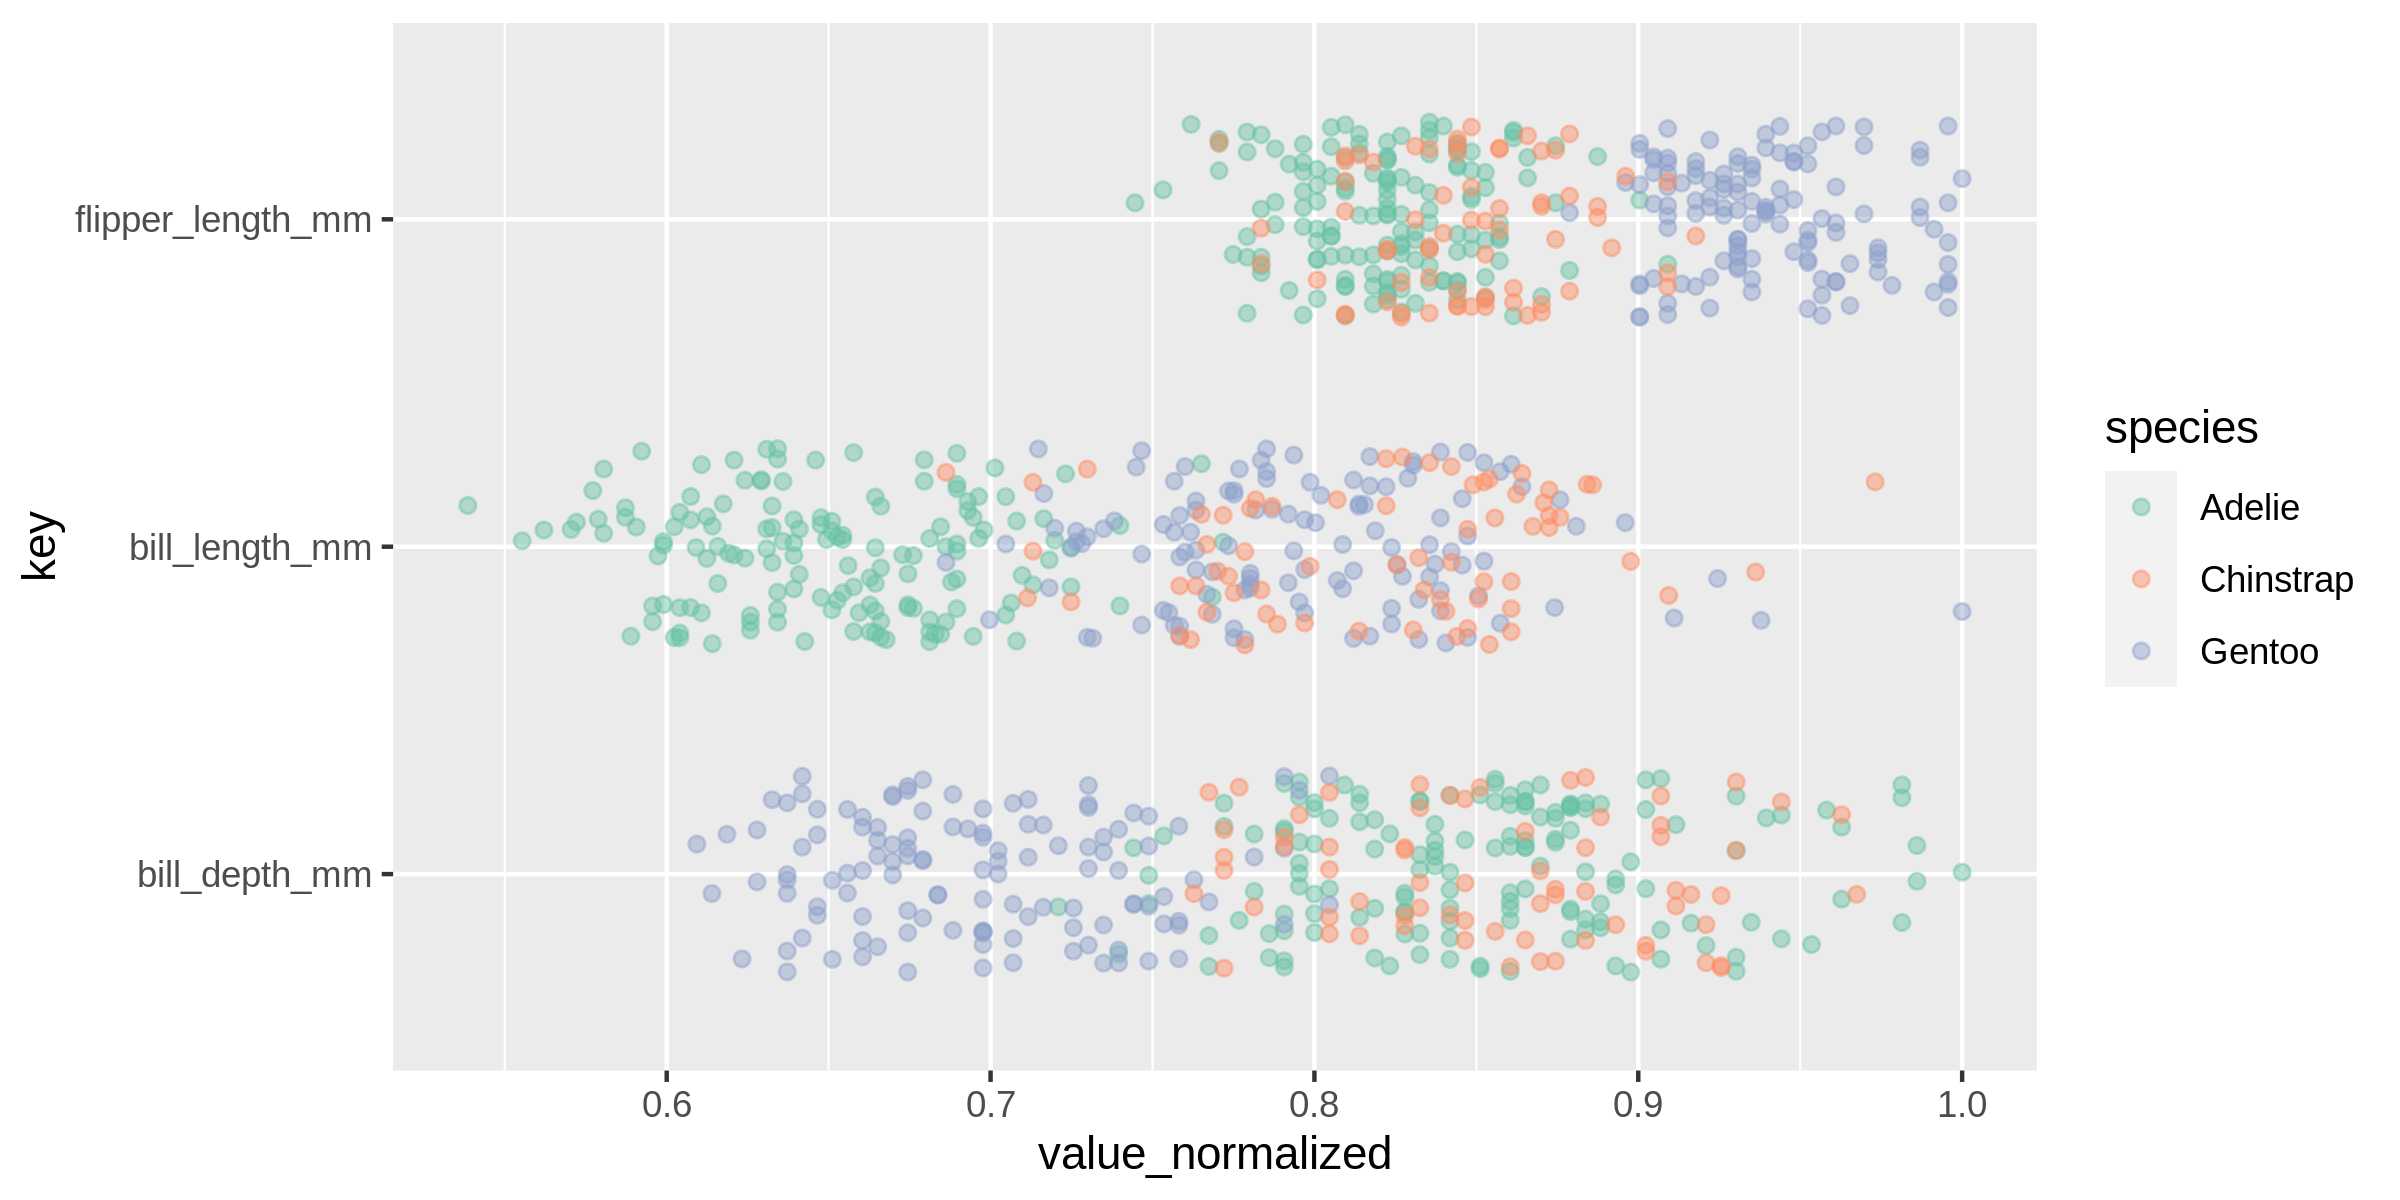

In [21]:
options(repr.plot.width = 8)
p = ggplot(penguins_long, aes(x= value_normalized, y = key, color = species)) + 
    geom_point(position = position_jitter(height = 0.3, width = 0), alpha = 0.45, na.rm = T) +
    scale_color_brewer(palette = 'Set2')
p